In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications, optimizers, Input, Model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = "../Dataset/Training_Set/"
validation_path = "../Dataset/Validation_Set/"
test_path = "../Dataset/Test_Set/"

In [3]:
img_height = 224
img_width = 224
batch_size = 64

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, rotation_range=40, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width), batch_size=batch_size, shuffle=True, class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(validation_path, target_size=(img_height, img_width), class_mode="categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size=(img_height, img_width), class_mode="categorical", batch_size = 1)

Found 5953 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
basemodel = applications.vgg16.VGG16(weights='imagenet',input_shape=(img_height, img_width, 3), include_top=False)

basemodel.trainable  = False

inputs = Input(shape=(img_height, img_width, 3))

x = basemodel(inputs, training = False)

x = GlobalAveragePooling2D()(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs, output)

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [7]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
70/94 [=====================>........] - ETA: 1:32 - loss: 0.5054 - accuracy: 0.7442

C:\Anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - 414s 4s/step - loss: 0.4683 - accuracy: 0.7729 - val_loss: 0.2301 - val_accuracy: 0.9150
Epoch 2/5
94/94 [==============================] - 420s 4s/step - loss: 0.2584 - accuracy: 0.9009 - val_loss: 0.1349 - val_accuracy: 0.9488
Epoch 3/5
94/94 [==============================] - 410s 4s/step - loss: 0.2823 - accuracy: 0.8888 - val_loss: 0.1635 - val_accuracy: 0.9388
Epoch 4/5
94/94 [==============================] - 391s 4s/step - loss: 0.1933 - accuracy: 0.9249 - val_loss: 0.1257 - val_accuracy: 0.9588
Epoch 5/5
94/94 [==============================] - 388s 4s/step - loss: 0.1751 - accuracy: 0.9347 - val_loss: 0.1091 - val_accuracy: 0.9600


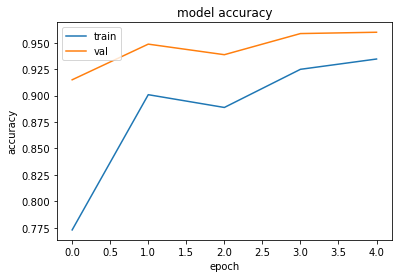

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

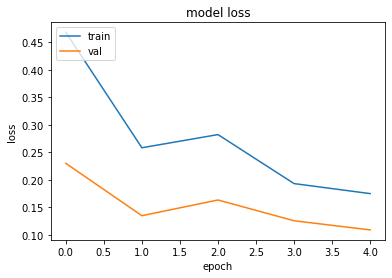

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.trainable = True

model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-5), loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [11]:
history1 = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
94/94 [==============================] - 1710s 18s/step - loss: 0.1038 - accuracy: 0.9622 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 2/10
94/94 [==============================] - 1762s 19s/step - loss: 0.0480 - accuracy: 0.9842 - val_loss: 0.0211 - val_accuracy: 0.9937
Epoch 3/10
94/94 [==============================] - 1709s 18s/step - loss: 0.0334 - accuracy: 0.9903 - val_loss: 0.0236 - val_accuracy: 0.9925
Epoch 4/10
94/94 [==============================] - 2159s 23s/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.0226 - val_accuracy: 0.9937
Epoch 5/10
94/94 [==============================] - 1774s 19s/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0049 - val_accuracy: 0.9975
Epoch 6/10
94/94 [==============================] - 1840s 20s/step - loss: 0.0165 - accuracy: 0.9958 - val_loss: 0.0123 - val_accuracy: 0.9937
Epoch 7/10
94/94 [==============================] - 1869s 20s/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0080 - val_accuracy: 0.9962

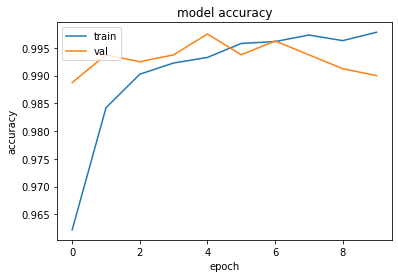

In [12]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

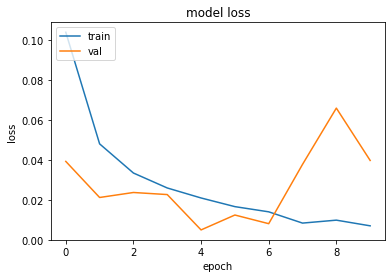

In [13]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
model_json = model.to_json()

# with open("../Model/model_json.json", "w") as json_file:
#     json_file.write(model_json)

# model.save_weights("../Model/model_weights.h5")

# model.save('../Model/model_hdf5.hdf5')

model.save("../Model/vgg16.h5")

In [15]:
correct = 0
for i in range(800):
    feature = test_generator[i][0]
    label = np.argmax(np.round(test_generator[i][1]))
    pred = np.argmax(np.round(model.predict(feature)))
    if pred == label:
        correct = correct + 1

In [16]:
correct * 100 / 800

99.25